# Crayon - People Attrition Forecast


Task defined based on the intstructions:
- binary classification issue
- prediction of possibility of employee attrition

#  Import packages

Please pip install the required packages. My assumption that these packages are already installed on the laptop of the task reviewer and only package import needed.

In [1]:
# Import packages
# Generic
import pandas as pd
import numpy as np
import math
from datetime import datetime
import seaborn as sns
from seaborn.rcmod import axes_style
import matplotlib.pyplot as plt

# Scaling
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Dimensionality reduction
from sklearn.decomposition import PCA

# Feature selection
from sklearn.linear_model import Lasso, LassoCV

# Train-test split
from sklearn.model_selection import train_test_split

# Sampling
from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb

# Metrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Model optimization
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import optuna
#from sklearn.model_selection import GridSearchCV

C:\Users\skepesi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data ingestion, basic checks


In [2]:
# Load raw data 
# Please change the path as per the path of the csv on your local computer!
raw_data = pd.read_csv(r'C:\Users\skepesi\Documents\CRAYON\input_data\Crayon_case_employee-attrition.csv', sep=',', encoding='UTF-8')

In [3]:
raw_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The info() indicates that there is no missing value, also it shows that data types requires careful revision.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Data preparation / set data types

In [5]:
# Create function that drop cols with one unique value as these cols are not useful from prediction prospectives
def drop_columns_with_one_unique_value(df):
    columns_to_drop = []
    
    for column in df.columns:
        unique_values = df[column].nunique()
        
        if unique_values == 1:
            columns_to_drop.append(column)
    
    df.drop(columns=columns_to_drop, inplace=True)
    
    return df

In [6]:
# Drop cols and create a new df for the pre-processing phase
prep_data =  drop_columns_with_one_unique_value(raw_data)
prep_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
# Set the cols to category which have numeric data type as default but have ordinal or categorical meaning indeed
prep_data[['Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']] = prep_data[['Education','EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']].astype('category')

# 'EmployeeNumber' will be excluded from the modelling, it is kept at this level for later tracking

In [8]:
# Create function that converts all columns with object dtype to category
def convert_object_to_category(df):
    object_columns = df.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        df[column] = df[column].astype('category')
    
    return df

In [9]:
prep_data = convert_object_to_category(prep_data)

In [10]:
# Downcast cols to uint8 from int64

def downcast_int64_columns(df):
    int64_columns = df.select_dtypes(include=['int64']).columns
    
    for column in int64_columns:
        max_value = df[column].max()
        min_value = df[column].min()
        
        if min_value >= 0 and max_value <= np.iinfo(np.uint8).max:
            df[column] = df[column].astype(np.uint8)
    
    return df


In [11]:
prep_data = downcast_int64_columns(prep_data)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   uint8   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   uint8   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   category
 9   EnvironmentSatisfaction   1470 non-null   category
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   uint8   
 12  JobInvolvement            1470 non-null   category
 13  JobLevel                  1470 non-null   catego

# Data preparation /  binning of continuous variables

In [12]:
# Checking the variables where we may need binning
numeric_cols = prep_data.select_dtypes(include='number').columns.tolist()
prep_data[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# Create bins for Age
bins = [18, 20, 25, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-25','25-30', '30-40', '40-50', '50-60', '>60']
#labels = ['18-25', '25-30', '30-40', '40-50', '50-60', '>60']
epsilon = 1e-8 #for resolving the issue of values that fall on the edge of the bins
prep_data['AgeGroup'] = pd.cut(prep_data['Age'] + epsilon, bins=bins, labels=labels)
prep_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,40-50
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,40-50
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,30-40
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,30-40
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,25-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,1,17,3,3,5,2,0,3,30-40
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,1,1,9,5,3,7,7,1,7,30-40
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,2,1,6,0,3,6,2,0,3,25-30
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,4,0,17,3,2,9,6,0,8,40-50


In [14]:
# Create bins for MonthlyIncome and MonthlyIncomeRate

# Create bins for MonthlyIncome
income_bins = [0, 1000, 5000, 10000, 15000, 20000, float('inf')]
income_labels = ['<1K', '1-5K', '5-10K', '10-15K', '15-20K', '>20']

# Create bins for MonthlyRate
rate_bins = [0, 1000, 2000, 3000, 4000, float('inf')]
rate_labels = ['<1K', '1-2K', '2-3K', '3-4K', '>4K']

epsilon = 1e-8  # for resolving the issue of values that fall on the edge of the bins

# Apply binning and assign labels to MonthlyIncome and MonthlyRate columns
prep_data['MonthlyIncomeGroup'] = pd.cut(prep_data['MonthlyIncome'] + epsilon, bins=income_bins, labels=income_labels)
prep_data['MonthlyRateGroup'] = pd.cut(prep_data['MonthlyRate'] + epsilon, bins=rate_bins, labels=rate_labels)

In [15]:
# Define bin intervals, labels, and epsilon
bins = [0, 3, 5, 10, 15, 20, 30, float('inf')]
labels = ['0-3', '3-5', '5-10', '10-15', '15-20', '20-30', '>30']
epsilon = 1e-8

# Columns to bin
cols_to_bin = ['TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Binning and creating new columns with 'Group' tag
for col in cols_to_bin:
    new_col_name = col + 'Group'
    prep_data[new_col_name] = pd.cut(prep_data[col] + epsilon, bins=bins, labels=labels)

# Convert the new binned columns to the category data type
new_cols_to_bin = [col + 'Group' for col in cols_to_bin]
prep_data[new_cols_to_bin] = prep_data[new_cols_to_bin].astype('category')

# Display the columns in the modified DataFrame
prep_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AgeGroup',
       'MonthlyIncomeGroup', 'MonthlyRateGroup', 'TotalWorkingYearsGroup',
       'YearsAtCompanyGroup', 'YearsInCurrentRoleGroup',
       'YearsSinceLastPromotionGroup', 'YearsWithCurrManagerGroup'],
      dtype='object')

In [16]:
# Create function for dynamic binning
def create_dynamic_bins(df, cols):
    for col in cols:
        bin_width = math.ceil((df[col].max() - df[col].min()) / 5)
        min_val = df[col].min()
        bins = [int(math.floor(min_val)) + i * bin_width for i in range(6)]
        labels = [f"{bins[i]:.0f}-{bins[i+1]:.0f}" for i in range(5)]
        epsilon = 1e-8  # for resolving the issue of values that fall on the edge of the bins
        df[col + 'Group'] = pd.cut(df[col] + epsilon, bins=bins, labels=labels)
    
    return df

In [17]:
# Run dynamic binning
dynamic_binning_cols = ['DailyRate', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike']
prep_data = create_dynamic_bins(prep_data, dynamic_binning_cols)

In [18]:
# Re-check all binned cols
prep_data[[col for col in prep_data.columns if 'Group' in col]]

,AgeGroup,MonthlyIncomeGroup,MonthlyRateGroup,TotalWorkingYearsGroup,YearsAtCompanyGroup,YearsInCurrentRoleGroup,YearsSinceLastPromotionGroup,YearsWithCurrManagerGroup,DailyRateGroup,DistanceFromHomeGroup,HourlyRateGroup,NumCompaniesWorkedGroup,PercentSalaryHikeGroup
0,40-50,5-10K,>4K,5-10,5-10,3-5,0-3,5-10,942-1222,1-7,86-100,8-10,11-14
1,40-50,5-10K,>4K,10-15,10-15,5-10,0-3,5-10,102-382,7-13,58-72,0-2,23-26
2,30-40,1-5K,2-3K,5-10,0-3,0-3,0-3,0-3,1222-1502,1-7,86-100,6-8,14-17
3,30-40,1-5K,>4K,5-10,5-10,5-10,3-5,0-3,1222-1502,1-7,44-58,0-2,11-14
4,25-30,1-5K,>4K,5-10,0-3,0-3,0-3,0-3,382-662,1-7,30-44,8-10,11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,30-40,1-5K,>4K,15-20,5-10,0-3,0-3,3-5,662-942,19-25,30-44,4-6,17-20
1466,30-40,5-10K,>4K,5-10,5-10,5-10,0-3,5-10,382-662,1-7,30-44,4-6,14-17
1467,25-30,5-10K,>4K,5-10,5-10,0-3,0-3,3-5,102-382,1-7,86-100,0-2,20-23
1468,40-50,5-10K,>4K,15-20,5-10,5-10,0-3,5-10,942-1222,1-7,58-72,2-4,14-17


#  Data discovery

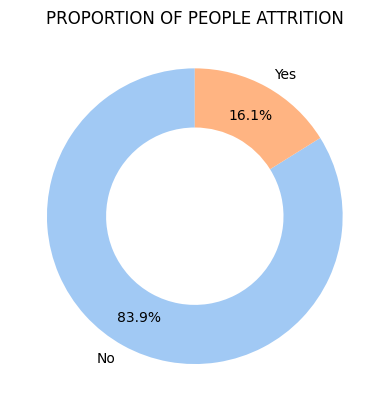

In [19]:
# Proportion of Attrition

# Count the occurrences of Attrition
attrition_counts = prep_data['Attrition'].value_counts()

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a pie chart
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, wedgeprops=dict(width=0.4),
        pctdistance=0.78)

# Set the title for the pie chart
plt.title("PROPORTION OF PEOPLE ATTRITION")

# Display the pie chart
plt.show()

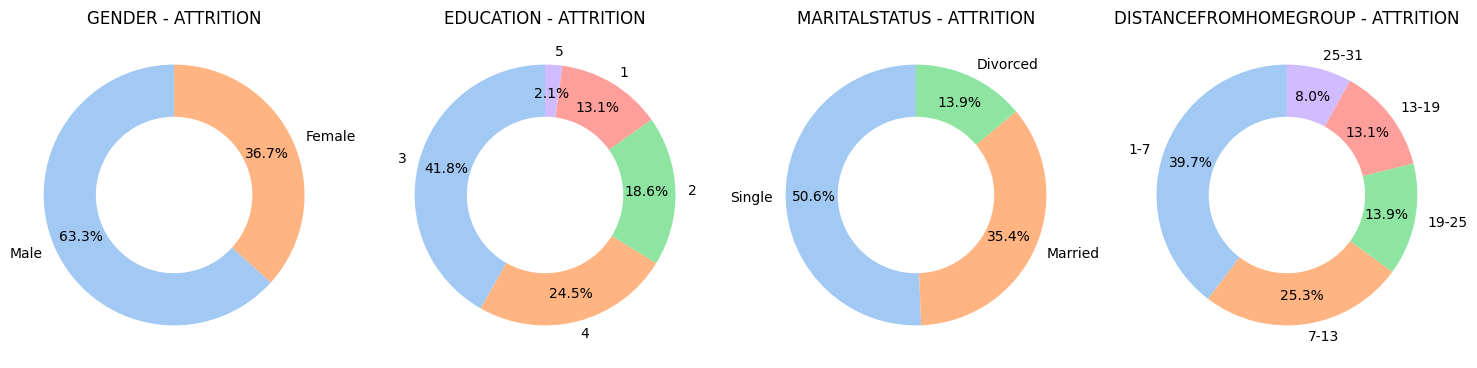

In [20]:
# Check how demographies influence attrition?

# Filter the data where Attrition is 'Yes'
filtered_data = prep_data[prep_data['Attrition'] == 'Yes']

# Define the columns for the donut charts
columns = ['Gender', 'Education', 'MaritalStatus', 'DistanceFromHomeGroup']

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create subplots for the donut charts
fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))

# Iterate over the columns and create donut charts
for i, column in enumerate(columns):
    # Count the occurrences of each category
    counts = filtered_data[column].value_counts()

    # Create a donut chart
    wedges, _, autotexts = axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%',
                                     startangle=90, colors=colors, wedgeprops=dict(width=0.4),
                                     pctdistance=0.78)

    # Add a white circle in the middle to create the donut effect
    center_circle = plt.Circle((0, 0), 0.2, color='white')
    axs[i].add_artist(center_circle)

    # Set the properties of the text inside the wedges
    for autotext in autotexts:
        autotext.set_color('black')  # Set text color to grey

    # Set the title for each donut chart
    axs[i].set_title((str(column) + " - Attrition").upper())

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the donut charts
plt.show()


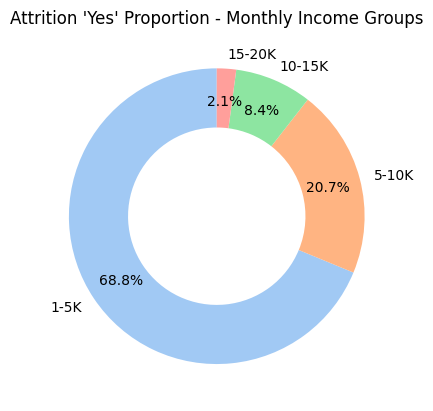

In [21]:
# How MonthlyIncome and Attrition related?

# Filter the data where Attrition is 'Yes'
filtered_data = prep_data[prep_data['Attrition'] == 'Yes']

# Group the filtered data by MonthlyIncomeGroups and count the occurrences
grouped_data = filtered_data.groupby('MonthlyIncomeGroup').size()

# Calculate the percentage of each group
grouped_data_percent = grouped_data / grouped_data.sum() * 100

# Filter the groups where the percentage is greater than or equal to 1%
filtered_groups = grouped_data_percent[grouped_data_percent >= 1]

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a pie chart for the filtered data
wedges, labels, _ = plt.pie(filtered_groups, labels=filtered_groups.index, autopct='%1.1f%%',
                            startangle=90, colors=colors, wedgeprops=dict(width=0.4),
                            pctdistance=0.78)

# Set the title for the pie chart
plt.title("Attrition 'Yes' Proportion - Monthly Income Groups")

# Display the pie chart
plt.show()

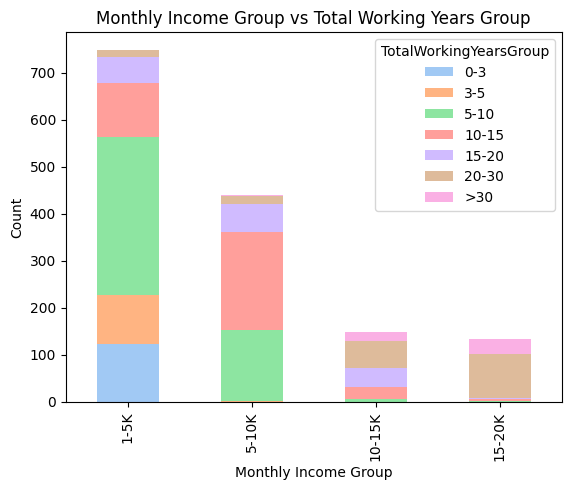

In [22]:
# How the MonthlyIncome related to TotalWorkingYears?

# Group the data by MonthlyIncomeGroup and TotalWorkingYearsGroup and calculate the frequencies
cross_table = pd.crosstab(prep_data['MonthlyIncomeGroup'], prep_data['TotalWorkingYearsGroup'])

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a stacked bar chart using seaborn with the pastel color palette
cross_table.plot(kind='bar', stacked=True, color=colors)

# Set the labels for the x-axis and y-axis
plt.xlabel('Monthly Income Group')
plt.ylabel('Count')

# Set the title for the chart
plt.title('Monthly Income Group vs Total Working Years Group')

# Display the chart
plt.show()


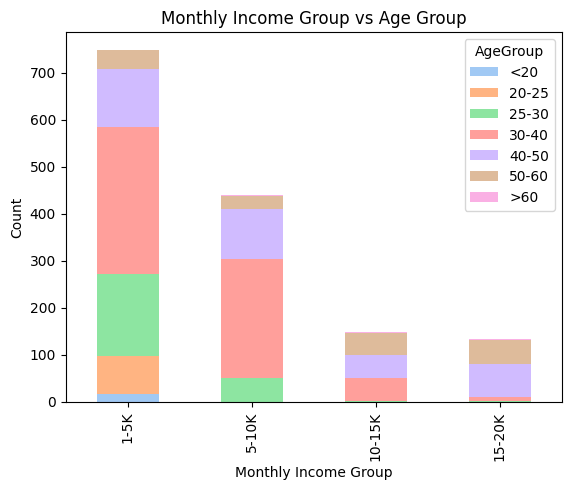

In [23]:
# How MonyhlyIncome and Age related?

# Group the data by MonthlyIncomeGroup and AgeGroup and calculate the frequencies
cross_table = pd.crosstab(prep_data['MonthlyIncomeGroup'], prep_data['AgeGroup'])

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a stacked bar chart using seaborn with the pastel color palette
cross_table.plot(kind='bar', stacked=True, color=colors)

# Set the labels for the x-axis and y-axis
plt.xlabel('Monthly Income Group')
plt.ylabel('Count')

# Set the title for the chart
plt.title('Monthly Income Group vs Age Group')

# Display the chart
plt.show()

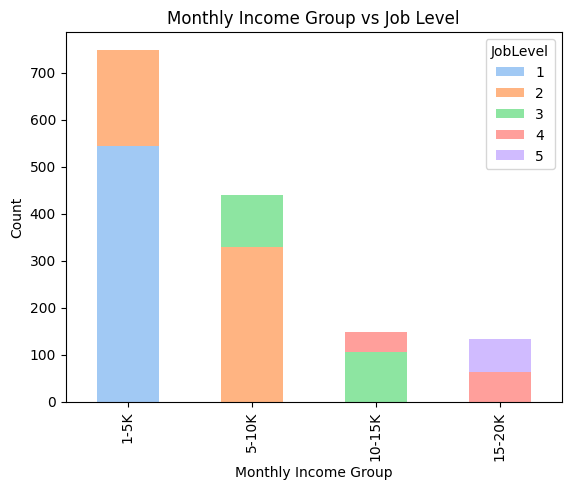

In [24]:
# How MonthlyIncome and Joble

# Group the data by MonthlyIncomeGroup and JobLevel and calculate the frequencies
cross_table = pd.crosstab(prep_data['MonthlyIncomeGroup'], prep_data['JobLevel'])

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a stacked bar chart using seaborn with the pastel color palette
cross_table.plot(kind='bar', stacked=True, color=colors)

# Set the labels for the x-axis and y-axis
plt.xlabel('Monthly Income Group')
plt.ylabel('Count')

# Set the title for the chart
plt.title('Monthly Income Group vs Job Level')

# Display the chart
plt.show()


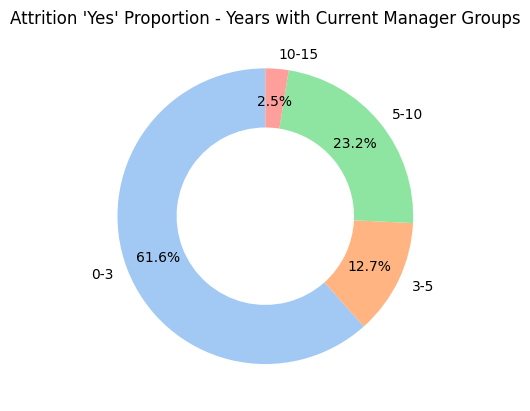

In [25]:
# How MonthlyIncome and Attrition related?

# Filter the data where Attrition is 'Yes'
filtered_data = prep_data[prep_data['Attrition'] == 'Yes']

# Group the filtered data by YearsWithCurrManagerGroup and count the occurrences
grouped_data = filtered_data.groupby('YearsWithCurrManagerGroup').size()

# Calculate the percentage for each group
grouped_data_percentage = grouped_data / grouped_data.sum() * 100

# Filter out the groups with less than 1% occurrence
filtered_groups = grouped_data_percentage[grouped_data_percentage > 1]

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a pie chart for the filtered data
wedges, labels, _ = plt.pie(filtered_groups, labels=filtered_groups.index, autopct='%1.1f%%',
                            startangle=90, colors=colors, wedgeprops=dict(width=0.4),
                            pctdistance=0.78
                           )

# Set the title for the pie chart
plt.title("Attrition 'Yes' Proportion - Years with Current Manager Groups")

# Display the pie chart
plt.show()

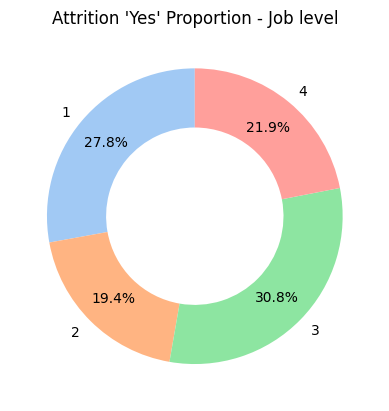

In [26]:
# Check assessment results are forecasting attriation?

# Filter the data where Attrition is 'Yes'
filtered_data = prep_data[prep_data['Attrition'] == 'Yes']

# Group the filtered data by MonthlyIncomeGroups and count the occurrences
grouped_data = filtered_data.groupby('JobSatisfaction').size()

# Set pastel color palette
colors = sns.color_palette('pastel')

# Create a pie chart for the filtered data
wedges, labels, _ = plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%',
                            startangle=90, colors=colors, wedgeprops=dict(width=0.4),
                           pctdistance=0.78
                           )

# Set the title for the pie chart
plt.title("Attrition 'Yes' Proportion - JobSatisfaction")


# Display the pie chart
plt.show()

# Feature engineering / Scaling and encoding

The numeric variables need to be brought onto the same dimension, scaling required. In case of categorical variables, double check required which columns mean categorical variables then the right encoding technique has to be identified. 
One hot encoding looks suitable in this case.

In [27]:
# Copy the prep data to do the scaling separately
scaled_data = prep_data.copy()
scaled_data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
# Get the names of numerical features
num_features = prep_data.select_dtypes(include='number').columns.tolist()
num_features 

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [29]:
# Remove outliers
for col in num_features :
    q1 = scaled_data[col].quantile(0.10)
    q3 = scaled_data[col].quantile(0.90)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    scaled_data = scaled_data[(scaled_data[col] >= lower_bound) & (scaled_data[col] <= upper_bound)]

In [30]:
len(scaled_data)

1468

In [31]:
# Scale the numerical features to the range of 0 and 1
scaler = MinMaxScaler()
scaled_data[num_features] = scaler.fit_transform(scaled_data[num_features])
scaled_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYearsGroup,YearsAtCompanyGroup,YearsInCurrentRoleGroup,YearsSinceLastPromotionGroup,YearsWithCurrManagerGroup,DailyRateGroup,DistanceFromHomeGroup,HourlyRateGroup,NumCompaniesWorkedGroup,PercentSalaryHikeGroup
0,0.547619,Yes,Travel_Rarely,0.715820,Sales,0.000000,2,Life Sciences,1,2,...,5-10,5-10,3-5,0-3,5-10,942-1222,1-7,86-100,8-10,11-14
1,0.738095,No,Travel_Frequently,0.126700,Research & Development,0.250000,1,Life Sciences,2,3,...,10-15,10-15,5-10,0-3,5-10,102-382,7-13,58-72,0-2,23-26
2,0.452381,Yes,Travel_Rarely,0.909807,Research & Development,0.035714,2,Other,4,4,...,5-10,0-3,0-3,0-3,0-3,1222-1502,1-7,86-100,6-8,14-17
3,0.357143,No,Travel_Frequently,0.923407,Research & Development,0.071429,4,Life Sciences,5,4,...,5-10,5-10,5-10,3-5,0-3,1222-1502,1-7,44-58,0-2,11-14
4,0.214286,No,Travel_Rarely,0.350036,Research & Development,0.035714,1,Medical,7,1,...,5-10,0-3,0-3,0-3,0-3,382-662,1-7,30-44,8-10,11-14


In [32]:
# Create functuion that transforms cols with Yes and No answers
def convert_yes_no_columns(df):
    for col in df.columns:
        unique_values = df[col].unique()
        
        if len(unique_values) == 2 and 'Yes' in unique_values and 'No' in unique_values:
            df[col] = df[col].replace({'Yes': 1, 'No': 0}).astype('category')
    
    return df

In [33]:
# Run Yes-No conversion
scaled_data = convert_yes_no_columns(scaled_data)
scaled_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYearsGroup,YearsAtCompanyGroup,YearsInCurrentRoleGroup,YearsSinceLastPromotionGroup,YearsWithCurrManagerGroup,DailyRateGroup,DistanceFromHomeGroup,HourlyRateGroup,NumCompaniesWorkedGroup,PercentSalaryHikeGroup
0,0.547619,1,Travel_Rarely,0.715820,Sales,0.000000,2,Life Sciences,1,2,...,5-10,5-10,3-5,0-3,5-10,942-1222,1-7,86-100,8-10,11-14
1,0.738095,0,Travel_Frequently,0.126700,Research & Development,0.250000,1,Life Sciences,2,3,...,10-15,10-15,5-10,0-3,5-10,102-382,7-13,58-72,0-2,23-26
2,0.452381,1,Travel_Rarely,0.909807,Research & Development,0.035714,2,Other,4,4,...,5-10,0-3,0-3,0-3,0-3,1222-1502,1-7,86-100,6-8,14-17
3,0.357143,0,Travel_Frequently,0.923407,Research & Development,0.071429,4,Life Sciences,5,4,...,5-10,5-10,5-10,3-5,0-3,1222-1502,1-7,44-58,0-2,11-14
4,0.214286,0,Travel_Rarely,0.350036,Research & Development,0.035714,1,Medical,7,1,...,5-10,0-3,0-3,0-3,0-3,382-662,1-7,30-44,8-10,11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0,Travel_Frequently,0.559771,Research & Development,0.785714,2,Medical,2061,3,...,15-20,5-10,0-3,0-3,3-5,662-942,19-25,30-44,4-6,17-20
1466,0.500000,0,Travel_Rarely,0.365784,Research & Development,0.178571,1,Medical,2062,4,...,5-10,5-10,5-10,0-3,5-10,382-662,1-7,30-44,4-6,14-17
1467,0.214286,0,Travel_Rarely,0.037938,Research & Development,0.107143,3,Life Sciences,2064,2,...,5-10,5-10,0-3,0-3,3-5,102-382,1-7,86-100,0-2,20-23
1468,0.738095,0,Travel_Frequently,0.659270,Sales,0.035714,3,Medical,2065,4,...,15-20,5-10,5-10,0-3,5-10,942-1222,1-7,58-72,2-4,14-17


In [34]:
# Transform Gender to 0 or 1
scaled_data['Gender']= scaled_data['Gender'].replace({'Male': 0, 'Female': 1}).astype('category')

In [35]:
categorical_features_to_onehot = []

for col in scaled_data.select_dtypes(include='category').columns.tolist():
    unique_values = scaled_data[col].unique()
    
    if set(unique_values).issubset({0, 1}):
        continue
    
    categorical_features_to_onehot.append(col)

scaled_data = pd.get_dummies(scaled_data, columns = categorical_features_to_onehot)

In [36]:
scaled_data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,NumCompaniesWorkedGroup_0-2,NumCompaniesWorkedGroup_2-4,NumCompaniesWorkedGroup_4-6,NumCompaniesWorkedGroup_6-8,NumCompaniesWorkedGroup_8-10,PercentSalaryHikeGroup_11-14,PercentSalaryHikeGroup_14-17,PercentSalaryHikeGroup_17-20,PercentSalaryHikeGroup_20-23,PercentSalaryHikeGroup_23-26
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,...,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,0.449883,0.501800,0.292234,0.512738,0.288906,0.490649,0.299576,0.300944,0.281046,0.466735,...,0.487738,0.207766,0.137602,0.098093,0.068801,0.418937,0.258856,0.168256,0.108311,0.045640
std,0.216866,0.288768,0.289441,0.290229,0.247824,0.285570,0.277592,0.261501,0.192958,0.214880,...,0.500020,0.405846,0.344599,0.297541,0.253202,0.493553,0.438155,0.374221,0.310878,0.208775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.257143,0.100132,0.239189,0.111111,0.071429,0.150000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.501790,0.214286,0.514286,0.205292,0.487513,0.222222,0.214286,0.250000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.595238,0.755369,0.464286,0.760714,0.386756,0.737462,0.444444,0.500000,0.375000,0.500000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature engineering / correlation and PCA

Highly correlating variables can impact the efficency of the classification model(it is not checked because of multicollinearity as this is not a regression but yet it impacts model efficiency when it comes to classification.) After the highly correlated columns are identified, PCA can be used to reduce the dimensionality of the dataset by combining these columns into a smaller set of principal components

In [37]:
# Separate the target variable and the rest of the variable for examining the correlations
scaled_data_X = scaled_data.drop('Attrition', axis=1)
scaled_data_y = scaled_data[['Attrition']]

In [38]:
# Check correlations among the variables
corr_matrix = scaled_data_X.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_values = corr_matrix.mask(mask).stack().reset_index()
corr_values.columns = ['feature1', 'feature2', 'correlation']
corr_values = corr_values.iloc[corr_values['correlation'].abs().argsort()[::-1]]
threshold = 0.8
most_correlating_features = corr_values[(corr_values['correlation'] > threshold) | (corr_values['correlation'] < -threshold)]
most_correlating_features

C:\Users\skepesi\AppData\Local\Temp\ipykernel_4004\1290325799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = scaled_data_X.corr()


,feature1,feature2,correlation
1169684,PerformanceRating_4,PerformanceRating_3,-1.000000
189,Department_Sales,Department_Research & Development,-0.906663
1143845,JobRole_Human Resources,Department_Human Resources,0.904978
1239537,YearsSinceLastPromotionGroup_0-3,YearsSinceLastPromotion,-0.837824
1293557,PercentSalaryHikeGroup_20-23,PerformanceRating_4,0.817025
1293556,PercentSalaryHikeGroup_20-23,PerformanceRating_3,-0.817025
1152940,JobRole_Sales Executive,Department_Sales,0.808493


In [39]:
# Create PCA object
pca = PCA(n_components=1)

# Use PCA for the highly correlating variable pairs and create new column that contains the PCA value
for cols in most_correlating_features[['feature1', 'feature2']].values.tolist():
    # Fit PCA model
    principal_components = pca.fit_transform(scaled_data[cols])
    # Add new column named based on the highly correlating features and PCA as value
    scaled_data[("|".join(cols))+'|pca'] = list([item for list in principal_components for item in list])

In [40]:
# Drop original columns and keep only PCA ones
scaled_data.drop(list(set(list([item for list in most_correlating_features[['feature1', 'feature2']].values.tolist() for item in list]))), axis=1, inplace=True)
len(scaled_data.columns)

1622

# Feature engineering / feature selection

Lasso is used for feature selection but also logistic regression was tested. The results look better with lasso.

In [41]:
# Separate input and output
scaled_data_X = scaled_data.drop('Attrition', axis=1)
scaled_data_y = scaled_data[['Attrition']]

# Apply lasso regularization with cross-validation for each output variable
lasso_model = LassoCV(cv=10, max_iter=10000)
lasso_model.fit(scaled_data_X, scaled_data_y.values.ravel())

# Select the optimal alpha value
optimal_alpha = lasso_model.alpha_
print(f"lasso optimal alpha: {optimal_alpha}")

# Fit the lasso models using the optimal alpha values 
# to select the best features for each output variable
lasso_model_oa = Lasso(alpha=optimal_alpha)
lasso_model_oa.fit(scaled_data_X, scaled_data_y)

# Get the features by lasso
lasso_selected_features = scaled_data_X.columns[lasso_model_oa.coef_ != 0]
print(lasso_selected_features)

lasso optimal alpha: 0.0015419467918106945
Index(['Age', 'DistanceFromHome', 'Gender', 'NumCompaniesWorked', 'OverTime',
       'TrainingTimesLastYear', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Education_1', 'Education_2', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobInvolvement_1', 'JobInvolvement_2',
       'JobInvolvement_3', 'JobInvolvement_4', 'JobLevel_1', 'JobLevel_2',
       'JobLevel_4', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobSatisfaction_1', 'JobSatisfaction_4', 'MaritalStatus_Single',
       'RelationshipSatisfaction_1', 'RelationshipSatisfaction_4',
       'StockOptionLevel_0', 'StockOptionLevel_1', 'StockOptionLevel_2',
 

# Feature engineering / sampling method

In [42]:
# Using stratified oversampling with RandomOverSampler as the data is imbalanced

# Initialize RandomOverSampler with 'minority' sampling_strategy and stratified sampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)


# Fit the RandomOverSampler to home_win_flag
X_ros, y_ros = ros.fit_resample(scaled_data_X[lasso_selected_features], scaled_data_y)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

# Baseline models and model selection

Develop baseline models that can be suitable for binary classification

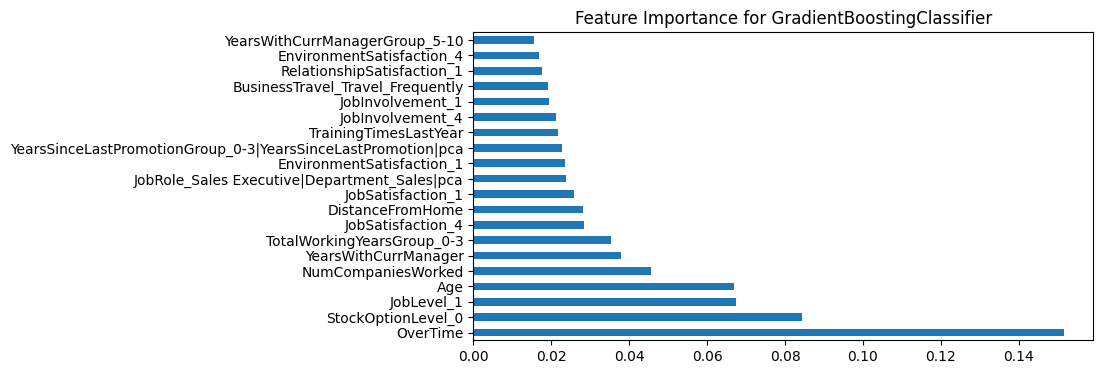

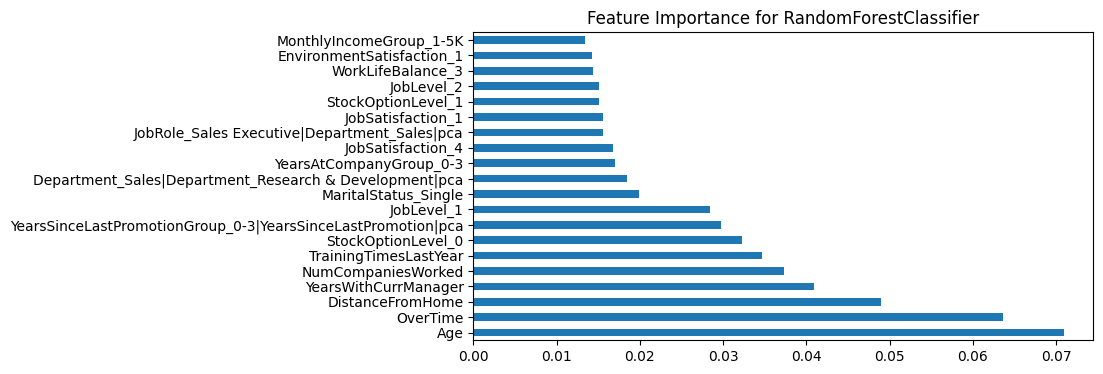

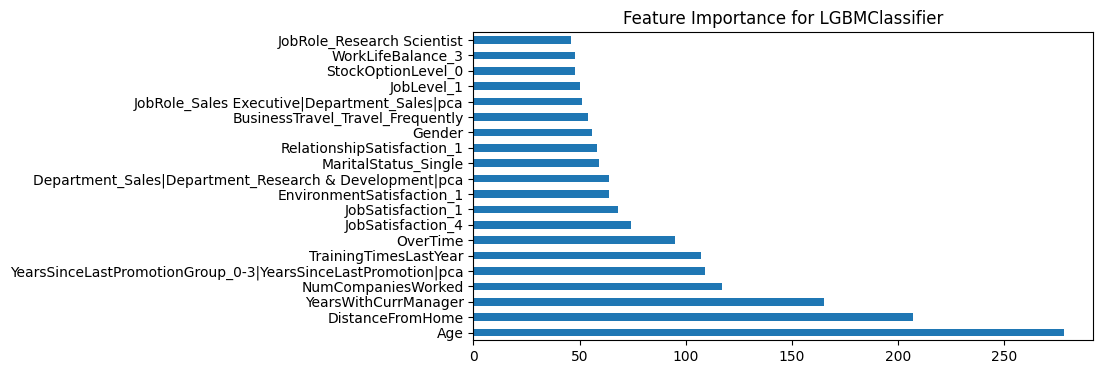

                        Model       AUC  Accuracy   TN  FP  FN   TP      Lift  \
0          LogisticRegression  0.898719  0.821501  196  46  42  209  1.609827   
1  GradientBoostingClassifier  0.953689  0.896552  215  27  24  227  1.755357   
2      RandomForestClassifier  0.999440  0.983773  234   8   0  251  1.903475   
3                  GaussianNB  0.816898  0.748479  170  72  52  199  1.442305   
4                         SVC  0.973626  0.943205  224  18  10  241  1.827639   
5              LGBMClassifier  0.994633  0.967546  226  16   0  251  1.846442   

    test_f1  
0  0.826087  
1  0.899010  
2  0.984314  
3  0.762452  
4  0.945098  
5  0.969112  


In [43]:
# Define the models to be used
models = [
    LogisticRegression(),
    GradientBoostingClassifier(),
    RandomForestClassifier(oob_score=True, random_state=42),
    GaussianNB(),
    SVC(probability=True),
    lgb.LGBMClassifier(),
]

# Define a list to store the results
results = []

# Loop through each model and fit it to the data
for model in models:
    # Fit the model to the data
    model.fit(X_train_ros, y_train_ros.values.ravel())

    # Evaluate the performance of the model on the test set
    y_pred = model.predict(X_test_ros)
    y_pred_proba = model.predict_proba(X_test_ros)[:,1]
    test_acc = model.score(X_test_ros, y_test_ros)
    test_auc = roc_auc_score(y_test_ros, y_pred_proba)
    tn, fp, fn, tp = confusion_matrix(y_test_ros, y_pred).ravel()
    lift = (tp / (tp + fp)) / ((tp + fn) / (tp + tn + fp + fn))
    test_f1 = 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))    

    # Plot feature importance for models that have it
    if hasattr(model, 'feature_importances_'):
        feat_importances = pd.Series(model.feature_importances_, index=X_train_ros.columns)
        feat_importances.nlargest(20).plot(kind='barh', figsize=(8,4))
        plt.title(f"Feature Importance for {model.__class__.__name__}")
        plt.show()

    # Store the results in the list
    results.append({'Model': model.__class__.__name__, 'AUC': test_auc, 'Accuracy': test_acc, 'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp, 'Lift': lift, 'test_f1': test_f1 })

# Convert the list to a dataframe and display the results
results_baseline_df = pd.DataFrame(results)
print(results_baseline_df)

# Optimizing top3 models

Applied Optuna for hypertunning on the top3 models

[I 2023-05-24 18:10:44,008] A new study created in memory with name: no-name-3f81fe60-430c-4658-b44b-36d82f1c890f
[I 2023-05-24 18:10:44,492] Trial 0 finished with value: 0.9894800961443482 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9894800961443482.
[I 2023-05-24 18:10:45,055] Trial 1 finished with value: 0.9889862039445524 and parameters: {'n_estimators': 130, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9894800961443482.
[I 2023-05-24 18:10:45,546] Trial 2 finished with value: 0.9859899245991242 and parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9894800961443482.
[I 2023-05-24 18:10:46,095] Trial 3 finished with value: 0.9986829541338778 and parameters: {'n_estimators': 120, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 3 with 

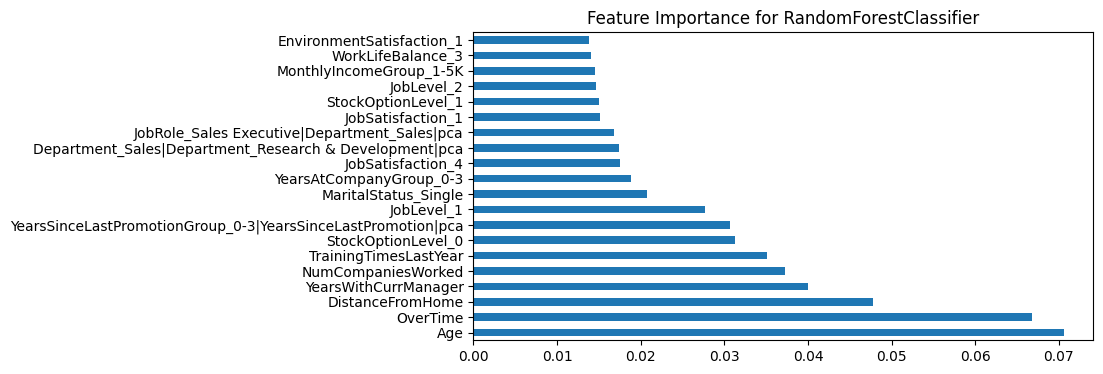

[I 2023-05-24 18:11:11,484] A new study created in memory with name: no-name-6fb47c8c-ce02-45d4-a7d3-5d6dec95dd23
[I 2023-05-24 18:11:12,519] Trial 0 finished with value: 0.8726745908926279 and parameters: {'C': 1, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 0.8726745908926279.
[I 2023-05-24 18:11:13,593] Trial 1 finished with value: 0.9378189720457015 and parameters: {'C': 0.1, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 1 with value: 0.9378189720457015.
[I 2023-05-24 18:11:14,821] Trial 2 finished with value: 0.8984228375753186 and parameters: {'C': 1, 'kernel': 'linear', 'gamma': 'scale', 'degree': 3}. Best is trial 1 with value: 0.9378189720457015.
[I 2023-05-24 18:11:16,096] Trial 3 finished with value: 0.9567103486878932 and parameters: {'C': 10, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}. Best is trial 3 with value: 0.9567103486878932.
[I 2023-05-24 18:11:23,873] Trial 4 finished with value: 0.8974679793223799 and paramete

[I 2023-05-24 18:12:07,913] Trial 8 finished with value: 0.9955220440551843 and parameters: {'num_leaves': 63, 'learning_rate': 0.05, 'n_estimators': 100, 'max_depth': -1}. Best is trial 1 with value: 1.0.
[I 2023-05-24 18:12:09,049] Trial 9 finished with value: 1.0 and parameters: {'num_leaves': 63, 'learning_rate': 0.05, 'n_estimators': 500, 'max_depth': 10}. Best is trial 1 with value: 1.0.
[I 2023-05-24 18:12:10,609] Trial 10 finished with value: 1.0 and parameters: {'num_leaves': 31, 'learning_rate': 0.05, 'n_estimators': 1000, 'max_depth': 10}. Best is trial 1 with value: 1.0.
[I 2023-05-24 18:12:11,723] Trial 11 finished with value: 1.0 and parameters: {'num_leaves': 31, 'learning_rate': 0.1, 'n_estimators': 1000, 'max_depth': -1}. Best is trial 1 with value: 1.0.
[I 2023-05-24 18:12:13,115] Trial 12 finished with value: 1.0 and parameters: {'num_leaves': 31, 'learning_rate': 0.05, 'n_estimators': 1000, 'max_depth': -1}. Best is trial 1 with value: 1.0.
[I 2023-05-24 18:12:14,20

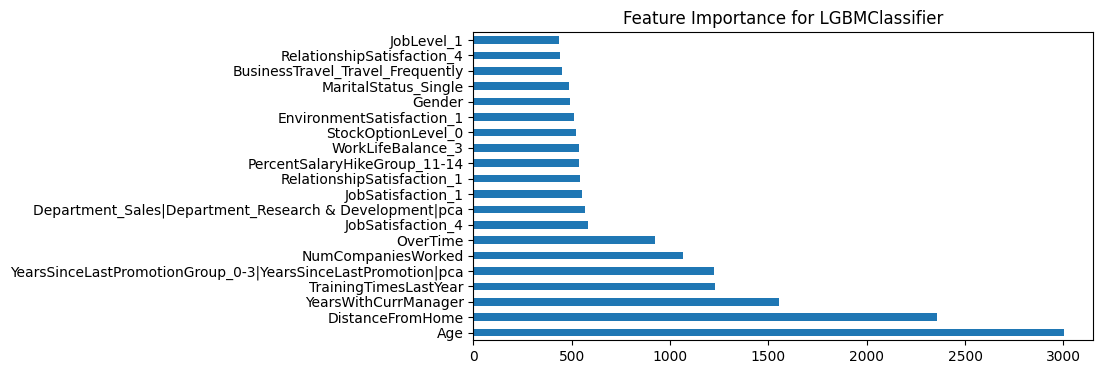

                    Model       AUC  Accuracy    Cv_AUC  Cv_Accuracy   TN  FP  \
0  RandomForestClassifier  0.999901  0.981744  0.993298     0.967524  226  16   
1                     SVC  1.000000  0.965517  0.990391     0.954847  226  16   
2          LGBMClassifier  1.000000  0.983773  0.990582     0.951286  226  16   

   FN   TP      Lift   test_f1  
0   0  251  1.846442  0.969112  
1   0  251  1.846442  0.969112  
2   0  251  1.846442  0.969112  


In [44]:
# Define the models to be used
models = [RandomForestClassifier(oob_score=True, random_state=42), SVC(probability=True), lgb.LGBMClassifier()]

# Define the hyperparameter space to search for each model
params = [
    {
        'n_estimators': [100, 110, 120, 130, 135, 140],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    {
        'num_leaves': [31, 63, 127],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'max_depth': [-1, 5, 10]
    }
]

# Define a list to store the results
results = []

# Loop through each model and fit it to the data
for i, model in enumerate(models):
    # Define the objective function for Optuna optimization
    def objective(trial):
        # Define the hyperparameters to search
        hyperparameters = {}
        for param_name, param_values in params[i].items():
            hyperparameters[param_name] = trial.suggest_categorical(param_name, param_values)

        # Create the model with the suggested hyperparameters
        model = models[i].set_params(**hyperparameters)

        # Fit the model to the data
        model.fit(X_train_ros, y_train_ros.values.ravel())

        # Evaluate the performance of the model on the test set
        y_pred_proba = model.predict_proba(X_test_ros)[:, 1]
        test_auc = roc_auc_score(y_test_ros, y_pred_proba)
        test_acc = model.score(X_test_ros, y_test_ros)
        tn, fp, fn, tp = confusion_matrix(y_test_ros, y_pred).ravel()
        lift = (tp / (tp + fp)) / ((tp + fn) / (tp + tn + fp + fn))
        test_f1 = 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))

        return test_auc

    # Create an Optuna study and optimize the objective function
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=30)

    # Get the best hyperparameters
    best_params = study.best_params

    # Create the model with the best hyperparameters
    best_model = models[i].set_params(**best_params)

        # Perform cross-validation
    cv_results = cross_validate(best_model, X_train_ros, y_train_ros.values.ravel(), cv=5, scoring=['accuracy', 'roc_auc'], n_jobs=-1)
    cv_acc = cv_results['test_accuracy'].mean()
    cv_auc = cv_results['test_roc_auc'].mean()

    # Fit the best model to the entire training set
    best_model.fit(X_train_ros, y_train_ros.values.ravel())

    # Evaluate the performance of the best model on the test set
    y_pred_proba = best_model.predict_proba(X_test_ros)[:, 1]
    test_auc = roc_auc_score(y_test_ros, y_pred_proba)
    test_acc = best_model.score(X_test_ros, y_test_ros)
    tn, fp, fn, tp = confusion_matrix(y_test_ros, y_pred).ravel()
    lift = (tp / (tp + fp)) / ((tp + fn) / (tp + tn + fp + fn))
    test_f1 = 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))

    # Plot feature importance for models that have it
    if hasattr(best_model, 'feature_importances_'):
        feat_importances = pd.Series(best_model.feature_importances_, index=X_train_ros.columns)
        feat_importances.nlargest(20).plot(kind='barh', figsize=(8, 4))
        plt.title(f"Feature Importance for {model.__class__.__name__}")
        plt.show()

    # Store the results in the list
    results.append({'Model': model.__class__.__name__, 'AUC': test_auc, 'Accuracy': test_acc,
                    'Cv_AUC': cv_auc, 'Cv_Accuracy': cv_acc, 'TN': tn, 'FP': fp,
                    'FN': fn, 'TP': tp, 'Lift': lift, 'test_f1': test_f1})
    
# Convert the list to a dataframe and display the results
results_optimized_df = pd.DataFrame(results)
print(results_optimized_df)